In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import FancyBboxPatch
#import mplcursors as mpc

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# plt.rcParams["figure.figsize"] = (16,10)
# plt.rcParams = {"figure.figsize": (16,10), "xticks.labelsize": 14, "yticks.labelsize": 14, 
#                 "xlabel.labelsize": 16, "ylabel.labelsize": 16,'figure.max_open_warning': 0}

In [4]:
df_anime= pd.read_csv('anime1.csv')

In [5]:
df_anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


# Data Cleaning

In [6]:
df_anime.isnull().sum().to_frame()

,0
MAL_ID,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
Type,0
Episodes,0
Aired,0
Premiered,0


In [7]:
df_anime.duplicated().sum()

0

In [8]:
ratings = df_anime[df_anime['Score'] != 'Unknown']
sorted_ratings = ratings.sort_values('Score', ascending = False).head(10).reset_index()
sorted_ratings.Score = sorted_ratings.Score.astype(float)

sorted_ratings.head()

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
1,15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
2,5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
3,14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",...,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
4,9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0


In [9]:
df_anime.Genres.value_counts()

Hentai                                                  969
Music                                                   790
Comedy                                                  668
Kids                                                    413
Kids, Music                                             234
                                                       ... 
Action, Comedy, Samurai                                   1
Action, Sci-Fi, Police, Psychological, Mecha, Seinen      1
Action, Comedy, Hentai                                    1
Fantasy, Kids, Magic, Romance, Shoujo, Super Power        1
Adventure, Mystery, Supernatural                          1
Name: Genres, Length: 5034, dtype: int64

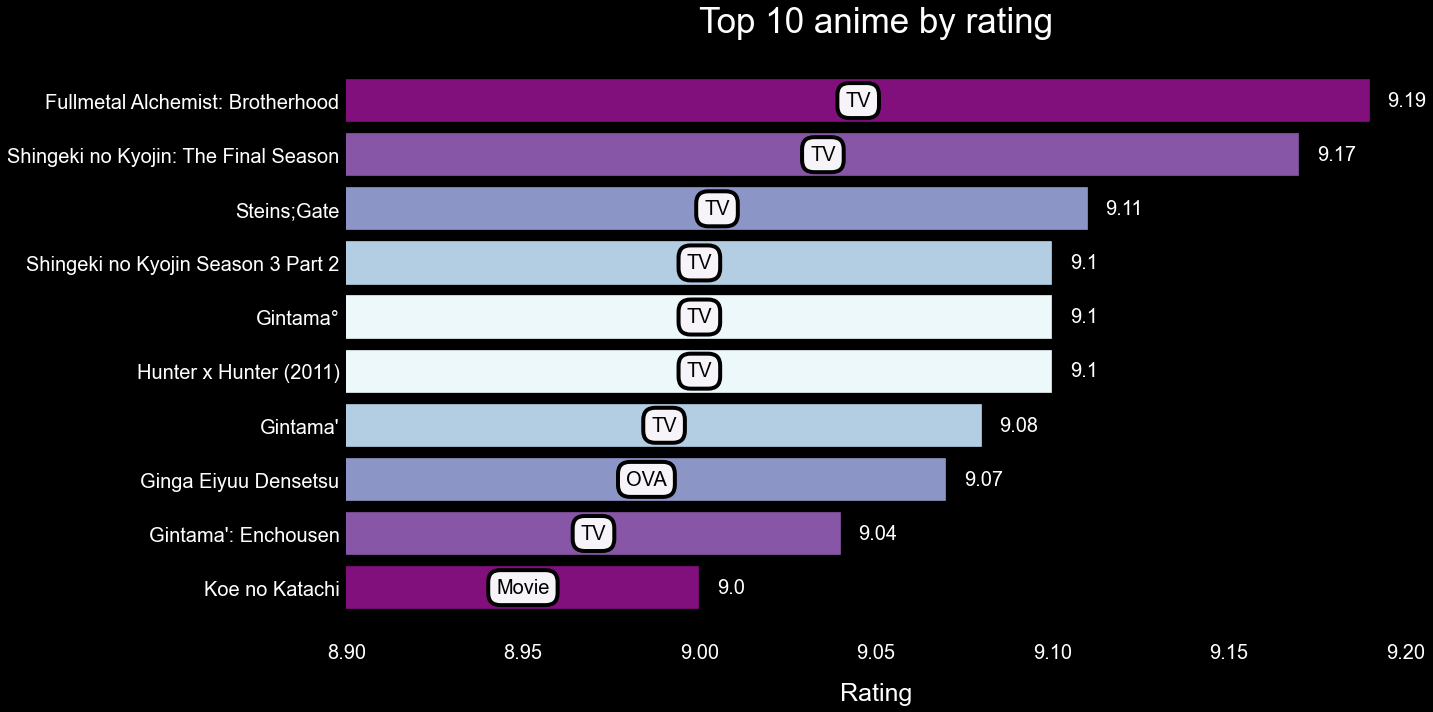

In [10]:
colors = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']
colors = list(sorted(colors)) + list(sorted(colors, reverse = True))

#shapes 
# rectangle = plt.Rectangle((8.92, 1), 0.05, 0.8, zorder = 5, bbox = dict(pad = 0.3))

plt.style.use(['seaborn','dark_background'])
plt.figure(figsize = (20,10))
# ax = plt.gca()
# ax.add_patch(rectangle)

x = plt.barh(sorted_ratings['Name'],sorted_ratings['Score'], edgecolor = 'k', color = colors)
for i in range(10):
    plt.text((8.90 + sorted_ratings['Score'][i])/2, i, sorted_ratings.Type[i], color = 'k',
             bbox = dict(facecolor = '#f7f4f9', edgecolor = 'k', linewidth = 4,
                        boxstyle = "round, pad = 0.4, rounding_size = 0.6"), 
             fontsize = 20, verticalalignment = 'center', horizontalalignment = 'center')
    plt.text(x = sorted_ratings['Score'][i] + 0.005, y = i, s = sorted_ratings['Score'][i], 
             color = 'white', verticalalignment = 'center', fontsize = 20)

plt.title('Top 10 anime by rating', size = 35, pad = 20)  
plt.xlabel('Rating', size = 25, labelpad = 20)
plt.xlim(8.9, 9.2)
plt.grid(visible = False)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

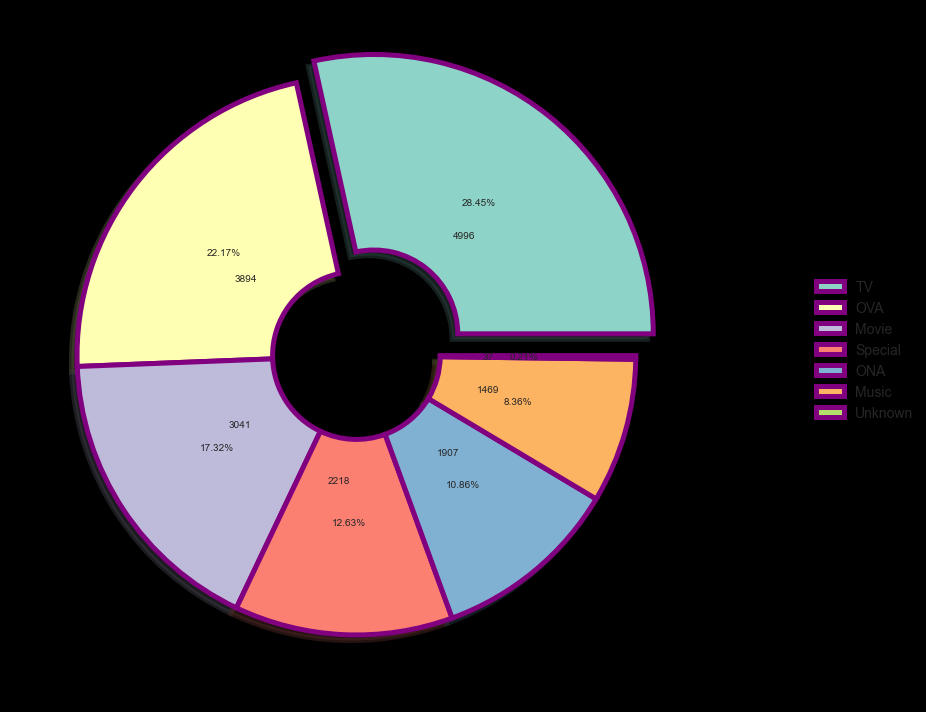

In [11]:
plt.figure(figsize = (16,10))
plt.style.use(['seaborn'])

color = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']

plt.pie(df_anime.Type.value_counts(), radius = 1, colors = color, shadow = True, 
        labels = df_anime.Type.value_counts(), autopct = '%.2f%%', explode = [0.1, 0, 0, 0, 0, 0, 0],
        labeldistance = 0.45,
        wedgeprops = {"edgecolor" : "purple", 'linewidth': 5, 'antialiased': True, 'width': 0.7})

plt.legend(labels = df_anime.Type.value_counts().index, fontsize = 14, loc = (1.15, 0.4))

plt.tight_layout()
plt.show()

In [12]:
ratings.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [13]:
ratings.Score = ratings.Score.astype(float)

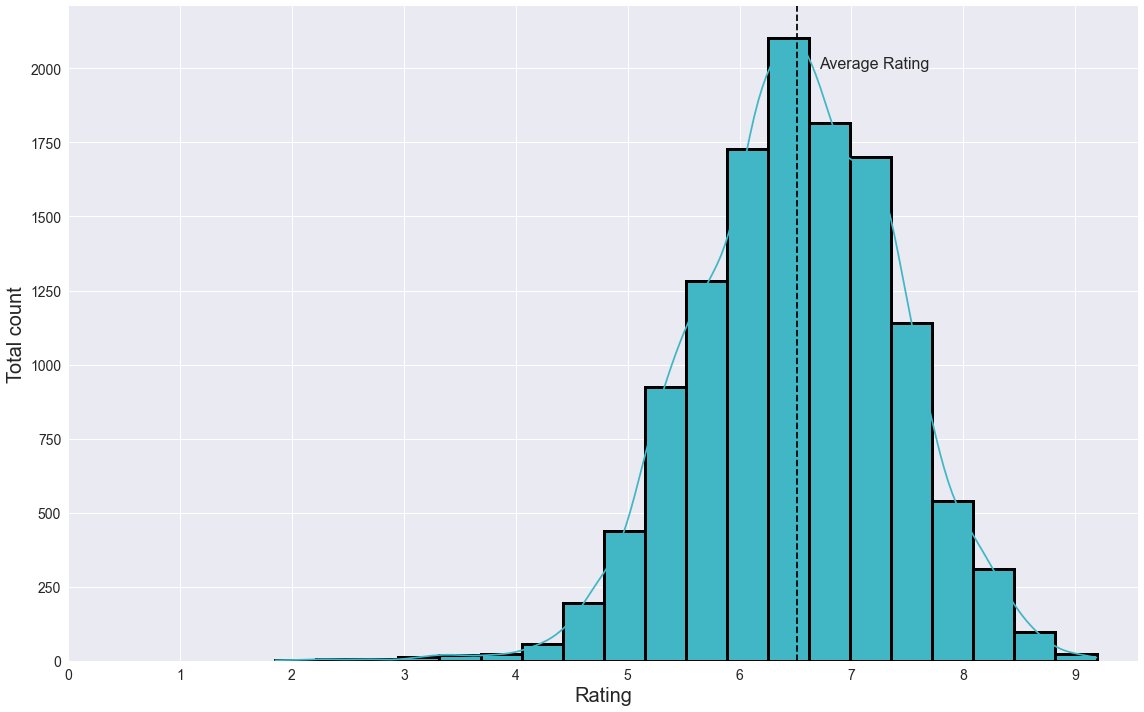

In [14]:
plt.style.use('seaborn')
plt.figure(figsize = (16,10))

sns.histplot(ratings.Score, kde = True, bins = 20, alpha = 1, color = '#41b6c4', edgecolor = 'k',
            linewidth = 3)
plt.axvline(np.mean(ratings.Score), color = 'k', ls = '--')
plt.text(np.mean(ratings.Score) + 0.2, 2000, 'Average Rating', fontsize = 16)

plt.xticks(np.arange(10), size = 14)
plt.yticks(size = 14)
plt.xlabel('Rating', size =20)
plt.ylabel('Total count', size =20)

plt.tight_layout()
plt.show()

In [15]:
top100 = ratings.sort_values('Score', ascending = False).head(100).reset_index()
top100.head(5)

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
1,15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
2,5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
3,14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",...,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
4,9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0


In [16]:
top100.Genres[1].split(', ')

['Action', 'Military', 'Mystery', 'Super Power', 'Drama', 'Fantasy', 'Shounen']

In [17]:
dictgen = {}
for i in range(100):
    for i in top100.Genres[i].split(', '):
        if i in list(dictgen.keys()):
            dictgen[i] += 1
        else:
            dictgen[i] = 1

In [18]:
genre_t = pd.DataFrame(dictgen, index = np.arange(1)).transpose().reset_index()
genre_t.columns = ['Genre', 'Total']
genre_t = genre_t.sort_values('Total', ascending = False).reset_index(drop = True)
genre_t

,Genre,Total
0,Drama,51
1,Comedy,42
2,Action,41
3,Shounen,41
4,Supernatural,31
5,Sci-Fi,27
6,Fantasy,24
7,Slice of Life,24
8,Historical,24
9,Mystery,21


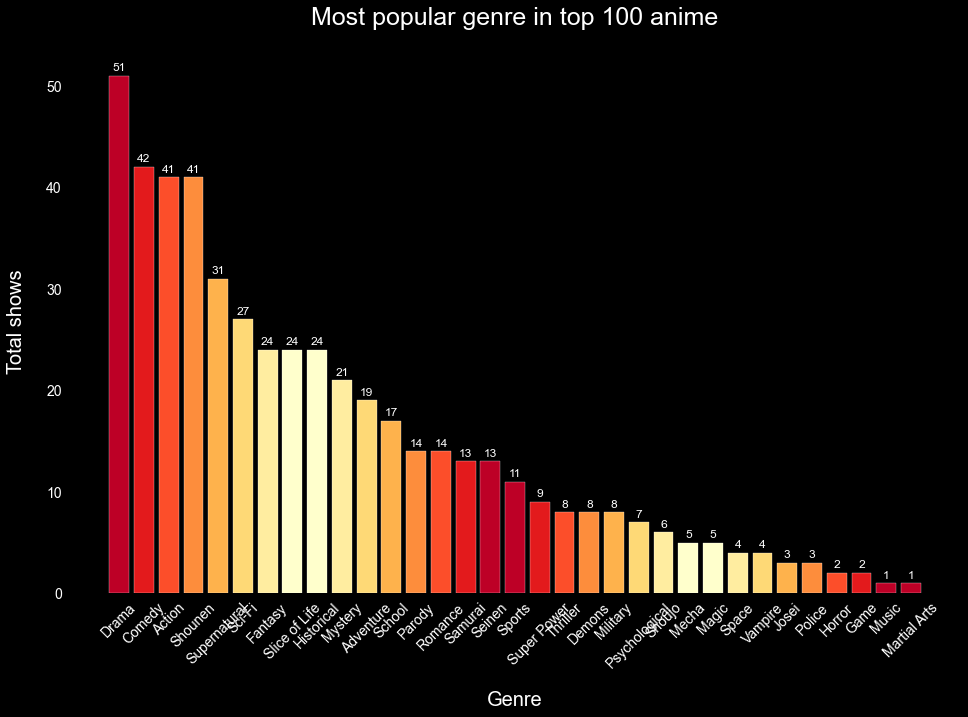

In [19]:
colors = ['#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026']
colors = list(reversed(colors)) + colors 

plt.style.use('dark_background')
plt.figure(figsize = (16,10))

plt.bar(genre_t.Genre, genre_t.Total, color = colors, edgecolor = 'white')
for i in range(len(dictgen)):
    plt.text(i, genre_t.Total[i]+0.5, genre_t.Total[i], horizontalalignment = 'center', 
             size = 12)

plt.title('Most popular genre in top 100 anime', size = 25, pad = 25)
plt.xlabel('Genre', fontsize = 20, labelpad = 20)
plt.ylabel('Total shows', fontsize = 20, labelpad = 20)
plt.xticks(rotation = 45, horizontalalignment = 'center', size = 14)
plt.yticks(size = 14)
plt.grid([])

# plt.tight_layout()
plt.show()

In [20]:
age_rating = df_anime['Rating'].value_counts().to_frame().reset_index()
age_rating.columns = ['Rating', 'Total']
age_rating

,Rating,Total
0,PG-13 - Teens 13 or older,6132
1,G - All Ages,5782
2,PG - Children,1461
3,Rx - Hentai,1345
4,R - 17+ (violence & profanity),1157
5,R+ - Mild Nudity,997
6,Unknown,688


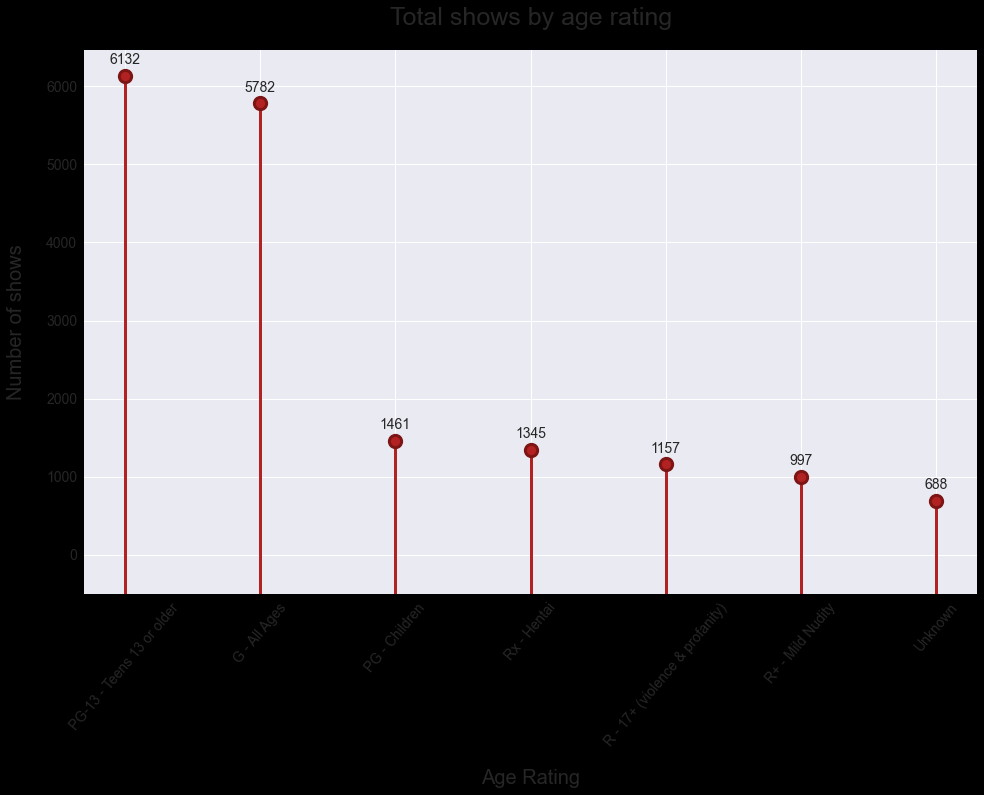

In [21]:
plt.figure(figsize = (16,10))
plt.style.use('seaborn')

plt.scatter(age_rating.Rating, age_rating.Total, edgecolor = '#7d1515', color = 'firebrick', s = 150, 
            linewidth = 3, zorder = 5)
for i in range(age_rating.shape[0]):
    plt.vlines(i, -500, age_rating.Total[i], color = 'firebrick', linewidth = 3)
    plt.text(i, age_rating.Total[i]+200, age_rating.Total[i], verticalalignment = 'center', 
             horizontalalignment = 'center', fontsize = 14)

plt.ylim(-500)
plt.xticks(size = 14, rotation = 50)
plt.yticks(size = 14)
plt.xlabel('Age Rating', size = 20, labelpad = 20)
plt.ylabel('Number of shows', size = 20, labelpad = 20)
plt.title('Total shows by age rating', size = 25, pad = 25)

plt.show()

In [22]:
gruplanmis_rating = df_anime.groupby(['Rating', 'Type'])['Type'].count().to_frame()
gruplanmis_rating.columns = ['Total']
gruplanmis_rating.reset_index(inplace =True)
gruplanmis_rating.Total = gruplanmis_rating.Total.astype(int)
average = np.mean(gruplanmis_rating.Total)

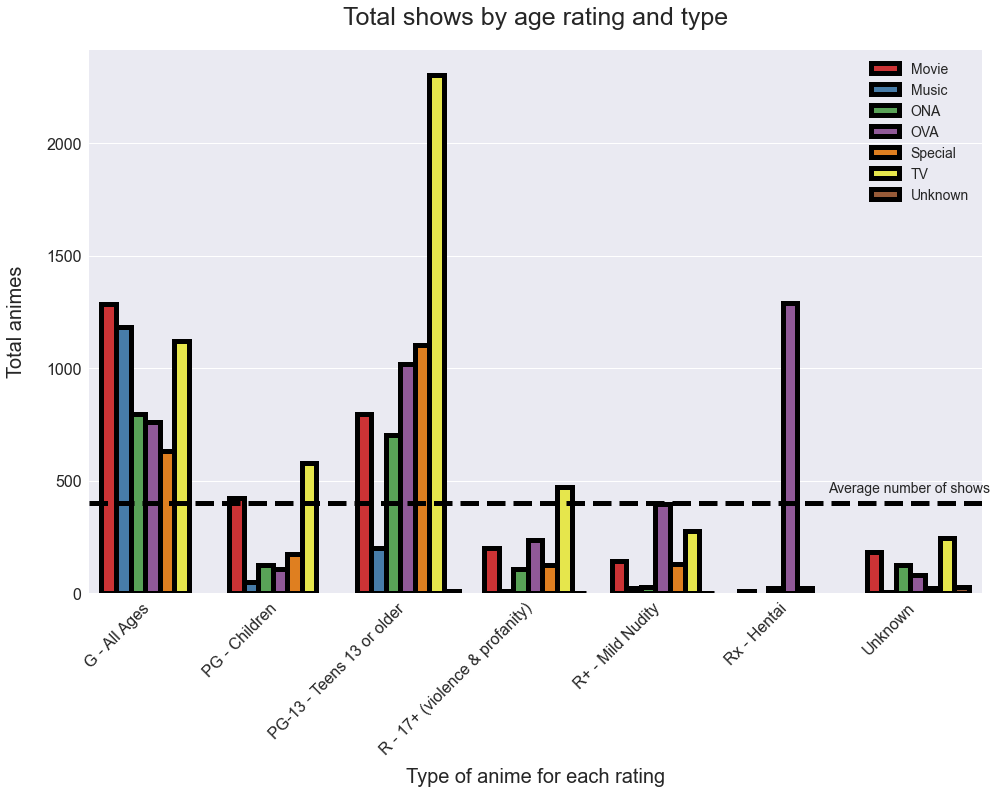

In [23]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

plt.figure(figsize = (16,10))

sns.barplot(gruplanmis_rating.Rating, gruplanmis_rating.Total,hue = gruplanmis_rating.Type, palette = colors, 
            edgecolor = 'k', linewidth = 5)
plt.axhline(average, c = 'k', linewidth = 5, ls = '--')
plt.text(5.3, average+50, 'Average number of shows', fontsize = 14)

plt.xticks(fontsize = 16, rotation = 45, horizontalalignment = 'right')
plt.yticks(fontsize = 16)
plt.legend(fontsize = 14)
plt.title('Total shows by age rating and type', size = 25, pad = 25)
plt.xlabel('Type of anime for each rating', size = 20, labelpad = 10)
plt.ylabel('Total animes', size = 20, labelpad = 20)

plt.show()

In [24]:
aired = df_anime[df_anime['Aired'] != 'Unknown'][['Name', 'Aired']]
aired

,Name,Aired
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999"
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001"
2,Trigun,"Apr 1, 1998 to Sep 30, 1998"
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002"
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005"
...,...,...
17556,Wan Jie Shen Zhu 3rd Season,"Mar 17, 2021 to ?"
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?"
17558,Mieruko-chan,2021 to ?
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?"


In [25]:
# function to extract the first appearance of a year in the aired column giving us the start year
def get_year(text):
    for i in range(0,len(text)):
        temp = text[i:i+5].strip()
        try:
            return int(temp)
        except:
            continue


In [26]:
aired['Start_year'] = aired.Aired.apply(get_year)
aired.head()

,Name,Aired,Start_year
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999",1998
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001",2001
2,Trigun,"Apr 1, 1998 to Sep 30, 1998",1998
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002",2002
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005",2004


In [27]:
sorted_year = aired.Start_year.value_counts().to_frame().reset_index()
sorted_year.columns = ['Year', 'Total']
sorted_year.sort_values('Year',inplace = True)
sorted_year

,Year,Total
61,1917,16
74,1918,7
91,1924,3
78,1925,6
76,1926,6
...,...,...
2,2018,882
5,2019,730
9,2020,603
20,2021,307


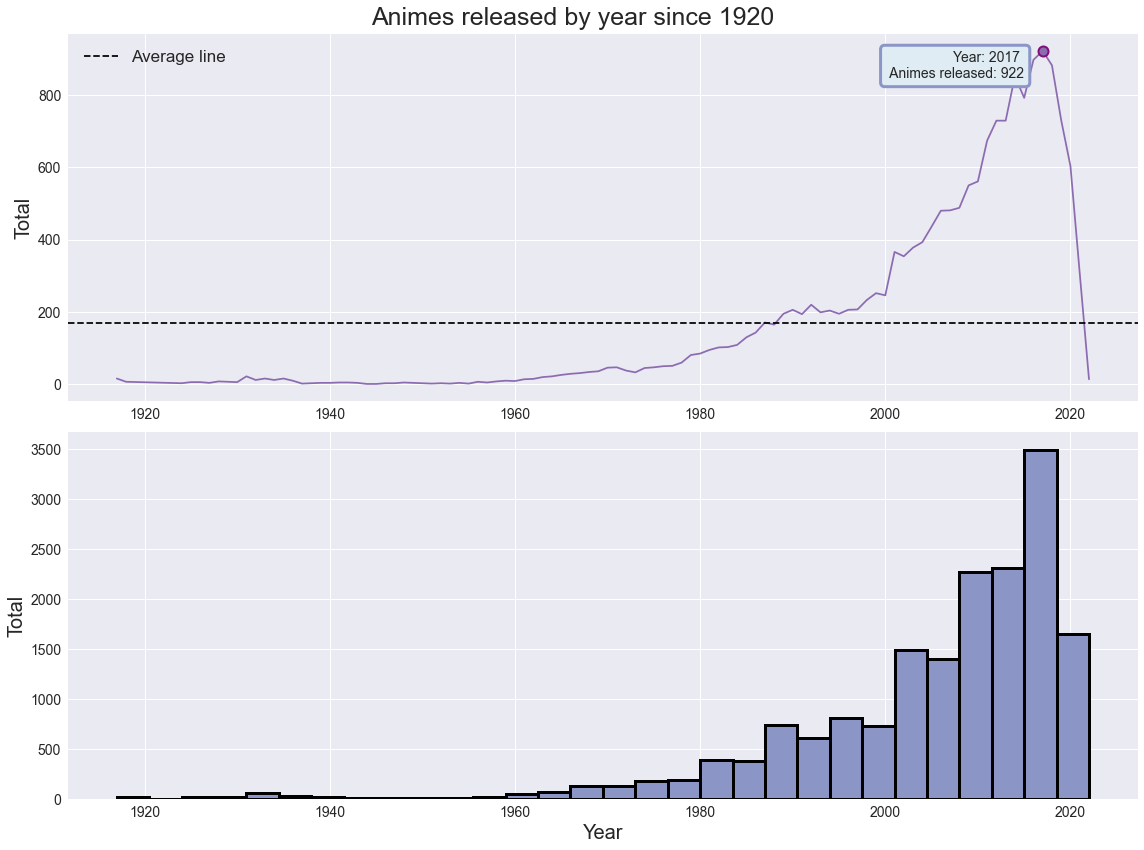

In [28]:
# circle = plt.Circle((2017,922), 20)
color = ['#ffffcc','#d9f0a3','#addd8e','#78c679','#31a354','#006837']

plt.style.use('seaborn')
plt.figure(figsize = (16,12))
plt.suptitle('Animes released by year since 1920', size = 25)

ax1 = plt.subplot(211)
ax1.plot(sorted_year.Year, sorted_year.Total, c  = '#8c6bb1')
ax1.scatter(2017, 922, s = 100, edgecolor = '#810f7c', facecolor = '#8c6bb1', linewidth = 2, zorder = 5)
ax1.text(2015, 922, 'Year: 2017 \n Animes released: 922', size = 14, verticalalignment = 'top', 
         horizontalalignment = 'right', 
         bbox = dict(pad = 5, facecolor = '#e0ecf4', edgecolor = '#8c96c6', linewidth = 3, 
                     boxstyle = ("round, pad = 0.4,rounding_size = 0.3")))
ax1.axhline(np.mean(sorted_year.Total), color = 'k', ls = '--', label = 'Average line')

ax1.tick_params(axis = 'both', labelsize = 14)
ax1.legend(fontsize = 17)
ax1.set_ylabel('Total', size = 20)
# ax1.add_patch(circle)


ax2 = plt.subplot(212)
sns.histplot(aired.Start_year, bins = 30, edgecolor = 'k', linewidth = '3', alpha = 1, color = '#8c96c6', ax = ax2)

ax2.set_xlabel('Year', size = 20)
ax2.set_ylabel('Total', size = 20)
ax2.tick_params(axis = 'both', labelsize = 14)
# plt.x

plt.tight_layout()
plt.show()